In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
main_df = pd.read_csv('files/dataset.csv')

In [3]:
main_df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [4]:
main_df.shape

(500, 2)

In [5]:
main_df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
main_df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
main_df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [9]:
main_df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

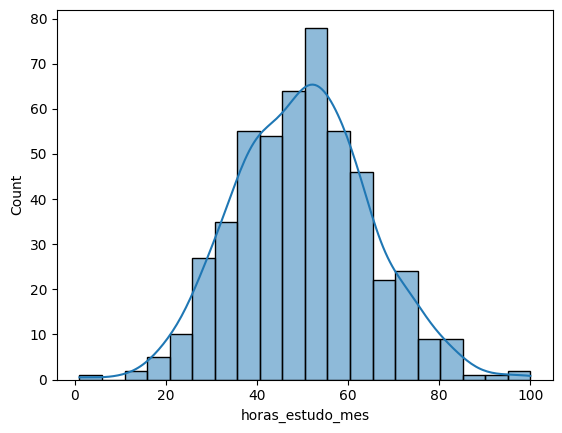

In [10]:
sns.histplot(data=main_df, x='horas_estudo_mes', kde=True)

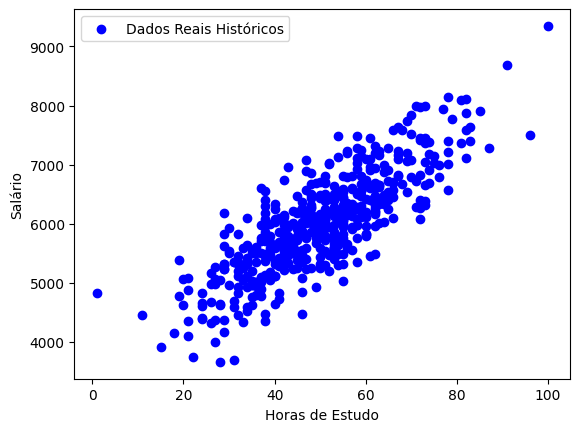

In [11]:
X = np.array(main_df['horas_estudo_mes']).reshape(-1, 1)

Y = main_df['salario']

plt.scatter(X, Y, color='blue', label="Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(400, 1)

In [14]:
X_test.shape

(100, 1)

In [15]:
Y_train.shape

(400,)

In [16]:
Y_test.shape

(100,)

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, Y_train)

LinearRegression()

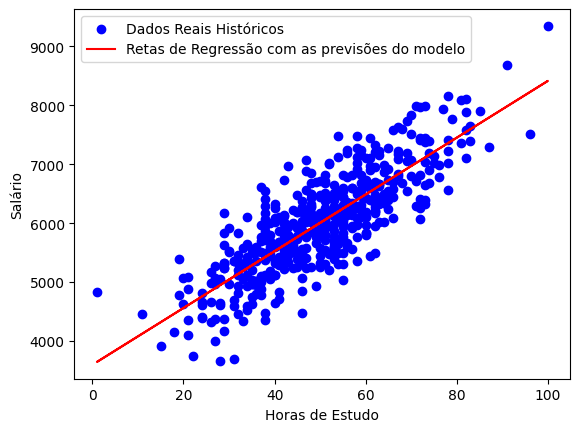

In [19]:
plt.scatter(X, Y, color='blue', label="Dados Reais Históricos")
plt.plot(X, model.predict(X), color='red', label="Retas de Regressão com as previsões do modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [20]:
score = model.score(X_test, Y_test)
print(f"Coeficiente (R²): {score:.2f}")

Coeficiente (R²): 0.59


In [21]:
model.intercept_

3596.783724372753

In [22]:
model.coef_

array([48.18185277])

In [27]:
new_study_hours = np.array([48]).reshape(-1, 1)

predicted_salary = model.predict(new_study_hours)

print(f"Salário previsto para {new_study_hours[0][0]} horas de estudo: R$ {predicted_salary[0]:.2f}")

Salário previsto para 48 horas de estudo: R$ 5909.51


In [28]:
#y_new = w0 + w1 * X
salary = model.intercept_ + model.coef_ * new_study_hours
print(f"Salário previsto para {new_study_hours[0][0]} horas de estudo: R$ {salary[0][0]:.2f}")

Salário previsto para 48 horas de estudo: R$ 5909.51
